# Foreword

In [96]:
len(range(7,20,2))

7

For the purpose of Data Science Special Syllabus Report, I am going to use the data from Robot Field for the year 2020. Following is a summary of the field and the dates when the data was collected from the field.


Date of data collections  
Subvplots in the field  
Distribution of dates in the season  
Days to heading  
Days to maturity  
Sowing dates  

# Preprocessing

In [66]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import math
import os
import datetime
from copy import copy
import pprint # pretty print
import time

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To display df nicely in loops
from IPython.display import display 
# display(df1.head()) 
# display(df2.head())

# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',50)

In [67]:
# Prints the current workinig directory
os.getcwd()
# os.listdir()

'C:\\Users\\fahad\\Documents\\GitHub\\vPheno\\DS Special Syllabus Report\\Code'

## Importing Data

In [68]:
path = './Data/'
list_data = os.listdir(path)
os.listdir(path)

['raw',
 'Robot_2020_mean_fixed_rows.csv',
 'Robot_2020_median_fixed_rows.csv',
 'Robot_2020_stdev_fixed_rows.csv',
 'Robot_fixed_cols.csv']

In [69]:
import_data = []
for csv_data in tqdm(list_data, desc="hello", unit="files"):
    if os.path.isfile(os.path.join(path, csv_data)):
        df_name = csv_data[:-4]
        import_data.append(df_name)

        locals()[df_name] = pd.read_csv(path+csv_data)
        print(df_name, '=====', locals()[df_name].shape)
    

hello: 100%|█████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 104.66files/s]

Robot_2020_mean_fixed_rows ===== (96, 114)
Robot_2020_median_fixed_rows ===== (96, 114)
Robot_2020_stdev_fixed_rows ===== (96, 114)
Robot_fixed_cols ===== (1344, 29)


## Dropping Mean and Std_Dev columns

In [70]:
columns_all = Robot_fixed_cols.columns
mean_cols = columns_all[columns_all.str.contains(pat='Mean', case=False)]
std_cols = columns_all[columns_all.str.contains(pat='Std_Dev', case=False)]

Robot_fixed_cols.drop(columns=mean_cols, inplace=True)
Robot_fixed_cols.drop(columns=std_cols, inplace=True)

Robot_fixed_cols

,Plot_ID,Blue_Median_Value,Green_Median_Value,Red_Median_Value,RedEdge_Median_Value,NIR_Median_Value,NDVI_Median_Value,MTCI_Median_Value,EVI_Median_Value,GrainYield,Days2Heading,Days2Maturity,Date
0,1101,0.021905,0.051635,0.028147,0.142298,0.465755,0.885390,2.803551,-1.261239,453.658537,62,109,2020-07-01
1,1102,0.028108,0.055910,0.035009,0.145149,0.458687,0.858816,2.861652,-1.100831,439.024390,62,113,2020-07-01
2,1103,0.026808,0.057188,0.034401,0.149912,0.468715,0.863303,2.768063,-1.156627,409.756098,60,106,2020-07-01
3,1104,0.024750,0.048598,0.030623,0.131659,0.455760,0.874434,3.206094,-1.163352,474.796748,61,110,2020-07-01
4,1105,0.029282,0.059577,0.035984,0.153574,0.473269,0.858489,2.720606,-1.136098,411.382114,61,106,2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,1808,0.033788,0.062602,0.084690,0.153530,0.250196,0.490993,1.428498,-0.273772,429.268293,61,105,2020-07-30
1340,1809,0.025289,0.053867,0.065721,0.147120,0.267604,0.601344,1.501041,-0.383402,414.634146,60,102,2020-07-30
1341,1810,0.034920,0.067794,0.076857,0.162150,0.280264,0.569404,1.406162,-0.352456,460.162602,62,107,2020-07-30
1342,1811,0.032249,0.059999,0.080487,0.146993,0.236998,0.487644,1.384678,-0.262991,443.902439,62,105,2020-07-30


In [71]:
# Initializing the comments to be appended to results
comments = []
comments.append('Median columns only')
comments.append('EVI included.')

# Data Trends Visualisation

# TODO: Correlation heatmap of indices with target

## ToDo: Identify Dates and index with problems

## Take average or delete dates with problems, out of trend

### Ecxclude the problematic data/dates
or
### Take average values where the problematic data is

Cleanup  
Remove dates which have drop  

## ToDo: Remove outliers

# Model Training

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline




In [73]:
df = Robot_fixed_cols.copy()
comments.append('Robot_fixed_cols dataset.')
comments.append(str(Robot_fixed_cols.shape))
comments.append('All data stacked on top of each other.')
df.head

<bound method NDFrame.head of       Plot_ID  Blue_Median_Value  Green_Median_Value  Red_Median_Value  \
0        1101           0.021905            0.051635          0.028147   
1        1102           0.028108            0.055910          0.035009   
2        1103           0.026808            0.057188          0.034401   
3        1104           0.024750            0.048598          0.030623   
4        1105           0.029282            0.059577          0.035984   
...       ...                ...                 ...               ...   
1339     1808           0.033788            0.062602          0.084690   
1340     1809           0.025289            0.053867          0.065721   
1341     1810           0.034920            0.067794          0.076857   
1342     1811           0.032249            0.059999          0.080487   
1343     1812           0.025546            0.045265          0.069339   

      RedEdge_Median_Value  NIR_Median_Value  NDVI_Median_Value  \
0             

In [74]:
# ToDo: Add check for duplicate columns in the df

# list_agg_df
yield_cols = ['GrainYield', 'Days2Heading', 'Days2Maturity']
id_cols_new = ['Plot_ID']

# Counter for location of column in columns list
loc = 0

# Dict for saving the name and location of the yield column
loc_yield_cols = {}

for cols in df.columns.tolist():
    for y_col in yield_cols:
        if not cols.find(y_col):
            loc_yield_cols[cols] = loc
            print(f'\"{cols}\" column in df seems like the yield column as it contains the text \"{y_col}\". It is located at location {loc}')
    loc += 1

yield_cols_found = list(loc_yield_cols.keys())
target_cols=yield_cols_found[0]

# # Droping yield columns, i.e. target variables and Plot_ID column
# Robot_2020_all.drop(columns = yield_cols_found+id_cols_new)
# Robot_2020_all[yield_cols_found]




"GrainYield" column in df seems like the yield column as it contains the text "GrainYield". It is located at location 9
"Days2Heading" column in df seems like the yield column as it contains the text "Days2Heading". It is located at location 10
"Days2Maturity" column in df seems like the yield column as it contains the text "Days2Maturity". It is located at location 11


In [75]:
%time

#==============================================================================
# Split dataframe into data and target
#==============================================================================

temp_X = df.drop(columns = yield_cols_found)
y = df[target_cols]
# y = df[target_cols].values.flatten()
comments.append('Drop Days2Heading and Days2Maturity features.')
comments.append('GrainYield Target.')

Wall time: 0 ns


# Converting dates to ordinal

In [76]:
temp_X
temp_X.info()
print('The entries in Date column are objects, instead of datetime object. We need to convert them.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Plot_ID               1344 non-null   int64  
 1   Blue_Median_Value     1344 non-null   float64
 2   Green_Median_Value    1344 non-null   float64
 3   Red_Median_Value      1344 non-null   float64
 4   RedEdge_Median_Value  1344 non-null   float64
 5   NIR_Median_Value      1344 non-null   float64
 6   NDVI_Median_Value     1344 non-null   float64
 7   MTCI_Median_Value     1344 non-null   float64
 8   EVI_Median_Value      1344 non-null   float64
 9   Date                  1344 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 105.1+ KB
The entries in Date column are objects, instead of datetime object. We need to convert them.


In [77]:
# Converting dates to datetime objects in pandas
temp_X['Date'] = pd.to_datetime(temp_X['Date'])

temp_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Plot_ID               1344 non-null   int64         
 1   Blue_Median_Value     1344 non-null   float64       
 2   Green_Median_Value    1344 non-null   float64       
 3   Red_Median_Value      1344 non-null   float64       
 4   RedEdge_Median_Value  1344 non-null   float64       
 5   NIR_Median_Value      1344 non-null   float64       
 6   NDVI_Median_Value     1344 non-null   float64       
 7   MTCI_Median_Value     1344 non-null   float64       
 8   EVI_Median_Value      1344 non-null   float64       
 9   Date                  1344 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 105.1 KB


In [78]:
temp_X.Date.unique()

array(['2020-07-01T00:00:00.000000000', '2020-08-04T00:00:00.000000000',
       '2020-07-07T00:00:00.000000000', '2020-08-12T00:00:00.000000000',
       '2020-07-13T00:00:00.000000000', '2020-06-18T00:00:00.000000000',
       '2020-07-20T00:00:00.000000000', '2020-07-22T00:00:00.000000000',
       '2020-06-23T00:00:00.000000000', '2020-06-24T00:00:00.000000000',
       '2020-06-25T00:00:00.000000000', '2020-07-27T00:00:00.000000000',
       '2020-06-29T00:00:00.000000000', '2020-07-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [79]:
# Converting the entries in Date column to ordinal values
# This is supposed to improve the predictions over the one hot encoding

import time, datetime
from datetime import datetime as dt

X = temp_X.copy()

X['Date'] = temp_X['Date'].apply(dt.toordinal)
X.drop(columns=['Plot_ID'], inplace=True)
comments.append('Converted dates to ordinal.')
comments.append('Plot ID Dropped.')

X

,Blue_Median_Value,Green_Median_Value,Red_Median_Value,RedEdge_Median_Value,NIR_Median_Value,NDVI_Median_Value,MTCI_Median_Value,EVI_Median_Value,Date
0,0.021905,0.051635,0.028147,0.142298,0.465755,0.885390,2.803551,-1.261239,737607
1,0.028108,0.055910,0.035009,0.145149,0.458687,0.858816,2.861652,-1.100831,737607
2,0.026808,0.057188,0.034401,0.149912,0.468715,0.863303,2.768063,-1.156627,737607
3,0.024750,0.048598,0.030623,0.131659,0.455760,0.874434,3.206094,-1.163352,737607
4,0.029282,0.059577,0.035984,0.153574,0.473269,0.858489,2.720606,-1.136098,737607
...,...,...,...,...,...,...,...,...,...
1339,0.033788,0.062602,0.084690,0.153530,0.250196,0.490993,1.428498,-0.273772,737636
1340,0.025289,0.053867,0.065721,0.147120,0.267604,0.601344,1.501041,-0.383402,737636
1341,0.034920,0.067794,0.076857,0.162150,0.280264,0.569404,1.406162,-0.352456,737636
1342,0.032249,0.059999,0.080487,0.146993,0.236998,0.487644,1.384678,-0.262991,737636


In [80]:
X

,Blue_Median_Value,Green_Median_Value,Red_Median_Value,RedEdge_Median_Value,NIR_Median_Value,NDVI_Median_Value,MTCI_Median_Value,EVI_Median_Value,Date
0,0.021905,0.051635,0.028147,0.142298,0.465755,0.885390,2.803551,-1.261239,737607
1,0.028108,0.055910,0.035009,0.145149,0.458687,0.858816,2.861652,-1.100831,737607
2,0.026808,0.057188,0.034401,0.149912,0.468715,0.863303,2.768063,-1.156627,737607
3,0.024750,0.048598,0.030623,0.131659,0.455760,0.874434,3.206094,-1.163352,737607
4,0.029282,0.059577,0.035984,0.153574,0.473269,0.858489,2.720606,-1.136098,737607
...,...,...,...,...,...,...,...,...,...
1339,0.033788,0.062602,0.084690,0.153530,0.250196,0.490993,1.428498,-0.273772,737636
1340,0.025289,0.053867,0.065721,0.147120,0.267604,0.601344,1.501041,-0.383402,737636
1341,0.034920,0.067794,0.076857,0.162150,0.280264,0.569404,1.406162,-0.352456,737636
1342,0.032249,0.059999,0.080487,0.146993,0.236998,0.487644,1.384678,-0.262991,737636


In [81]:
%time

from sklearn.model_selection import train_test_split

#==============================================================================
# Create separate train/test splits from Main data
#==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=5)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
comments.append('Test train split. test_Size=0.3, random_state=55')

Wall time: 0 ns


In [82]:
%time

from sklearn.preprocessing import StandardScaler

#==============================================================================
# Scale features using StandardScaler class in scikit-learn 
#==============================================================================

# Initialise standard scaler and compute mean and STD from training data
sc = StandardScaler()
sc.fit(X_train)

# Transform (standardise) both X_train and X_test with mean and STD from
# training data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

comments.append('Standard scaler fit transform.')

Wall time: 0 ns


In [83]:
X

,Blue_Median_Value,Green_Median_Value,Red_Median_Value,RedEdge_Median_Value,NIR_Median_Value,NDVI_Median_Value,MTCI_Median_Value,EVI_Median_Value,Date
0,0.021905,0.051635,0.028147,0.142298,0.465755,0.885390,2.803551,-1.261239,737607
1,0.028108,0.055910,0.035009,0.145149,0.458687,0.858816,2.861652,-1.100831,737607
2,0.026808,0.057188,0.034401,0.149912,0.468715,0.863303,2.768063,-1.156627,737607
3,0.024750,0.048598,0.030623,0.131659,0.455760,0.874434,3.206094,-1.163352,737607
4,0.029282,0.059577,0.035984,0.153574,0.473269,0.858489,2.720606,-1.136098,737607
...,...,...,...,...,...,...,...,...,...
1339,0.033788,0.062602,0.084690,0.153530,0.250196,0.490993,1.428498,-0.273772,737636
1340,0.025289,0.053867,0.065721,0.147120,0.267604,0.601344,1.501041,-0.383402,737636
1341,0.034920,0.067794,0.076857,0.162150,0.280264,0.569404,1.406162,-0.352456,737636
1342,0.032249,0.059999,0.080487,0.146993,0.236998,0.487644,1.384678,-0.262991,737636


In [84]:
%time

#==============================================================================
# Defining the function to vaiidate the model with the test data and 
# get the results from regression evaluation metrices in sklearn
#==============================================================================
pred = []
acc = []
def test_data_regression(model):
    pred = []
    accuracy = {}
    #==============================================================================
    # Make predictions for test set
    #==============================================================================

    # Predict classes for samples in test set
    y_pred = model.predict(X_test)
    
    #==============================================================================
    # Compute performance
    #==============================================================================
    
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred, squared=True)
    print(mse, ' mean_squared_error')
#     accuracy.append(rmse)
    accuracy['MSE'] = mse
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(rmse, ' root_mean_squared_error')
#     accuracy.append(rmse)
    accuracy['RMSE'] = rmse

    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)
    print(r2, ' r2_score')
    accuracy['R2 Score'] = r2

    acc.append(accuracy)
    # Print accuracy computed from predictions on the test set
    pp = pprint.PrettyPrinter(indent=4, width=80, depth=None, stream=None, compact=True, sort_dicts=False)
    pp.pprint(accuracy)
    
    #==============================================================================
    # Append Results
    #==============================================================================
    results = []
    import datetime
    datetime = datetime.datetime.now()
    results.append(np.concatenate((np.array((model, mse, rmse, r2, accuracy, datetime), dtype=object), np.array(comments))))
#     results.extend(np.array(comments)) 
    print(results)
    pd.DataFrame(np.asarray(results)).to_csv('results.csv',
                                             mode='a',
                                             header=None)
    pred.extend(y_pred)

Wall time: 0 ns


In [85]:
%time

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 1000, max_depth=250, min_samples_split=5, random_state=0, n_jobs = -1)
# model = RandomForestRegressor(n_estimators = 50, max_depth=100, min_samples_split=400, random_state=0, n_jobs = -1)
model.fit(X_train, y_train)

test_data_regression(model)

Wall time: 0 ns
4655.863348382419  mean_squared_error
68.23388709711926  root_mean_squared_error
0.5692016100143511  r2_score
{   'MSE': 4655.863348382419,
    'RMSE': 68.23388709711926,
    'R2 Score': 0.5692016100143511}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.863348382419, 68.23388709711926, 0.5692016100143511,
       {'MSE': 4655.863348382419, 'RMSE': 68.23388709711926, 'R2 Score': 0.5692016100143511},
       datetime.datetime(2021, 4, 30, 18, 9, 28, 770208),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols dataset.', '(1344, 13)',
       'All data stacked on top of each other.',
       'Drop Days2Heading and Days2Maturity features.',
       'GrainYield Target.', 'Converted dates to ordinal.',
       'Plot ID Dropped.',
       'Test train split. test_Size=0.3, random_state=55',
       'Standard scaler fit transform.'], dtype=object)]


In [86]:
X

,Blue_Median_Value,Green_Median_Value,Red_Median_Value,RedEdge_Median_Value,NIR_Median_Value,NDVI_Median_Value,MTCI_Median_Value,EVI_Median_Value,Date
0,0.021905,0.051635,0.028147,0.142298,0.465755,0.885390,2.803551,-1.261239,737607
1,0.028108,0.055910,0.035009,0.145149,0.458687,0.858816,2.861652,-1.100831,737607
2,0.026808,0.057188,0.034401,0.149912,0.468715,0.863303,2.768063,-1.156627,737607
3,0.024750,0.048598,0.030623,0.131659,0.455760,0.874434,3.206094,-1.163352,737607
4,0.029282,0.059577,0.035984,0.153574,0.473269,0.858489,2.720606,-1.136098,737607
...,...,...,...,...,...,...,...,...,...
1339,0.033788,0.062602,0.084690,0.153530,0.250196,0.490993,1.428498,-0.273772,737636
1340,0.025289,0.053867,0.065721,0.147120,0.267604,0.601344,1.501041,-0.383402,737636
1341,0.034920,0.067794,0.076857,0.162150,0.280264,0.569404,1.406162,-0.352456,737636
1342,0.032249,0.059999,0.080487,0.146993,0.236998,0.487644,1.384678,-0.262991,737636


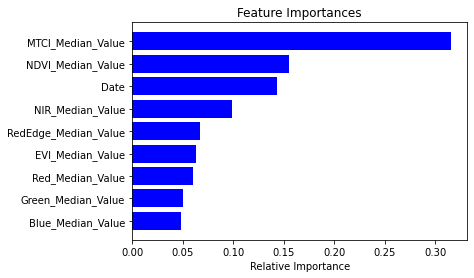

In [87]:
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Grid and Random Search

In [88]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.

pca = PCA()
sc = StandardScaler()
# model = LogisticRegression(max_iter=10000, tol=0.1)
model = RandomForestRegressor()

model =  SVR()
pipe = Pipeline(steps=[('sc', sc), ('pca', pca), ('model', model)])


# Define the pipeline (scaling and classification method):

# Define ranges of parameter values:
param_range  = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0] # For regularization parameter C.
param_range2 = [0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]         # For scaling parameter gamma og rbf-kernel.
param_range3 = [x for x in range(50)]
param_range4 = [x for x in range(10)]
param_range5 = [x for x in range(100)]
# , 'rbf', 'sigmoid'
# 'linear', 'poly'
param_grid   =  [{'model__kernel' : (['sigmoid']),'model__C' : [1,5,10],
                 'model__degree' : [3,8],'model__coef0' : [0.01,10,0.5],'model__gamma' : ('auto','scale')}]


# param_grid   = [{'randomforestregressor__max_depth': param_range3,
#                  'randomforestregressor__min_samples_split': param_range5,
#                  'randomforestregressor__n_estimators': param_range4,
#                  'pca__n_components': [5,6,7,8,9,10,11,12,13]}]

estimator = pipe
# score = 'neg_mean_squared_error'
score = 'r2'
cv = 3

# pipe.get_params()

## Grid and Random search functions

In [89]:
def grid(Xtrain=X_train,
         ytrain=y_train,
         estimator=pipe,
         params_grid=param_grid,
         scores=score,
         cvs=cv,
         cores=-1,
         verb=5):

    t1 = time.time()

    gs = GridSearchCV(estimator=estimator,
                      param_grid=params_grid,
                      scoring=scores,
                      cv=cvs,
                      n_jobs=cores,
                      verbose=verb)

    gs = gs.fit(Xtrain, ytrain)
    print(gs.best_score_)
    print(gs.best_params_)
    
    t2 = time.time()

    # Saving results to csv file
    results = []
    import datetime
    datetime = datetime.datetime.now()
    results.append(np.array((gs.best_estimator_, gs, score, gs.best_score_, gs.best_params_, 
                             (t2 - t1) / 60, datetime), dtype=object), np.array(comments))

    pd.DataFrame(np.asarray(results)).to_csv('results.csv',
                                             mode='a',
                                             header=None)

    print('Total time: ', (t2 - t1) / 60, 'minutes')

In [90]:
def rand_search(Xtrain=X_train,
                ytrain=y_train,
                estimator=pipe,
                params_grid=param_grid,
                scores=score,
                cvs=cv,
                n_iter_search=25,
                cores=-1,
                verb=5):

    t1 = time.time()

    random_search = RandomizedSearchCV(estimator,
                                       param_distributions=params_grid,
                                       n_iter=n_iter_search,
                                       scoring=scores,
                                       cv=cvs,
                                       verbose=verb)

    random_search = random_search.fit(Xtrain, ytrain)
    print(random_search.best_score_)
    print(random_search.best_params_)

    t2 = time.time()
    
    # Saving results to csv file
    results = []
    import datetime
    datetime = datetime.datetime.now()
    results.append(np.array((gs.best_estimator_, gs, score, gs.best_score_, gs.best_params_, 
                             (t2 - t1) / 60, datetime), dtype=object))

    pd.DataFrame(np.asarray(results)).to_csv('results.csv',
                                             mode='a',
                                             header=None)


    print('Total time: ', (t2 - t1) / 60, 'minutes')

## Running Search

In [27]:
# , 'rbf', 'sigmoid'
# 'linear', 'poly'
param_grid   =  [{'model__kernel' : ('linear','poly'),'model__C' : [x for x in range(30,35)],
                 'model__degree' : [x for x in range(1,8)],'model__coef0' : [x/100 for x in range(50,63,5)],
                  'model__gamma' : ('auto','scale'),
                 'pca__n_components': [5,6,7,8,9,10,11,12,13]}]


# param_grid   = [{'randomforestregressor__max_depth': param_range3,
#                  'randomforestregressor__min_samples_split': param_range5,
#                  'randomforestregressor__n_estimators': param_range4,
#                  'pca__n_components': [5,6,7,8,9,10,11,12,13]}]

estimator = pipe
# score = 'neg_mean_squared_error'
score = 'r2'
cv = 10

In [28]:
# grid(Xtrain = X_train_std,
#             ytrain = y_train_std,
#             estimator = pipe,
#             params_grid = param_grid,
#             scores=score,
#             cvs = cv,
#             cores=6,
#             verb=15)

In [ ]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.

pca = PCA()
sc = StandardScaler()
# Define the pipeline (scaling and classification method):

# Define ranges of parameter values:
param_range  = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0] # For regularization parameter C.
param_range2 = [0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]         # For scaling parameter gamma og rbf-kernel.
param_range3 = [x for x in range(50)]
param_range4 = [x for x in range(10)]
param_range5 = [x for x in range(100)]
# , 'rbf', 'sigmoid'
# 'linear', 'poly'
param_grid   =  [{'model__kernel' : (['sigmoid']),'model__C' : [1,5,10],
                 'model__degree' : [3,8],'model__coef0' : [0.01,10,0.5],'model__gamma' : ('auto','scale')}]


# param_grid   = [{'randomforestregressor__max_depth': param_range3,
#                  'randomforestregressor__min_samples_split': param_range5,
#                  'randomforestregressor__n_estimators': param_range4,
#                  'pca__n_components': [5,6,7,8,9,10,11,12,13]}]


In [43]:
X.shape

(1344, 9)

# Ridge

In [45]:
from sklearn.linear_model import Ridge

model = Ridge()

pipe = Pipeline(steps=[('sc', sc), ('model', model)])

param_grid   =  [{'model__alpha' : [x*1. for x in range(1,10)],
                  'model__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]
pipe.get_params()

estimator = pipe

scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cv = 10

for score in scores:
    grid(Xtrain = X_train_std,
                ytrain = y_train,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=6,
                verb=5)
    print(score)

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    0.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-67.198966244721
{'model__alpha': 1.0, 'model__solver': 'lsqr'}
Total time:  0.01333242654800415 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    0.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-6655.268708760681
{'model__alpha': 1.0, 'model__solver': 'lsqr'}
Total time:  0.014162854353586832 minutes
neg_mean_squared_error
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.6s


0.3116912451929214
{'model__alpha': 1.0, 'model__solver': 'lsqr'}
Total time:  0.01611698865890503 minutes
r2


[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    0.9s finished


In [40]:
from sklearn.linear_model import Ridge

model = Ridge()

pipe = Pipeline(steps=[('sc', sc), ('pca', pca), ('model', model)])

params_pca = [1,2,3,4,5,6,7]
param_grid   =  [{'pca__n_components' : params_pca,
                  'model__alpha' : [x*1. for x in range(1,100,5)],
                  'model__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]
pipe.get_params()

estimator = pipe
# score = 'neg_mean_squared_error'
# score = 'neg_mean_absolute_error'
score = 'r2'
cv = 10

grid(Xtrain = X_train_std,
            ytrain = y_train,
            estimator = pipe,
            params_grid = param_grid,
            scores=score,
            cvs = cv,
            cores=6,
            verb=15)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0066s.) Setting batch_size=2.
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (

Fitting 10 folds for each of 980 candidates, totalling 9800 fits


[Parallel(n_jobs=6)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  48 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  52 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  76 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  80 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  84 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0835s.) Setting batch_size=16.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 108 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:    0.2s
[P

[Parallel(n_jobs=6)]: Done 3508 tasks      | elapsed:    4.6s
[Parallel(n_jobs=6)]: Done 3540 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 3572 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 3604 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 3636 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 3668 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 3700 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done 3732 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done 3764 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done 3796 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done 3860 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done 3892 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 3924 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 3956 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done 3988 tasks      | elapsed:    5.2s
[Paralle

[Parallel(n_jobs=6)]: Done 7924 tasks      | elapsed:   10.9s
[Parallel(n_jobs=6)]: Done 7956 tasks      | elapsed:   10.9s
[Parallel(n_jobs=6)]: Done 7988 tasks      | elapsed:   10.9s
[Parallel(n_jobs=6)]: Done 8020 tasks      | elapsed:   10.9s
[Parallel(n_jobs=6)]: Done 8052 tasks      | elapsed:   11.0s
[Parallel(n_jobs=6)]: Done 8084 tasks      | elapsed:   11.0s
[Parallel(n_jobs=6)]: Done 8116 tasks      | elapsed:   11.2s
[Parallel(n_jobs=6)]: Done 8148 tasks      | elapsed:   11.2s
[Parallel(n_jobs=6)]: Done 8180 tasks      | elapsed:   11.2s
[Parallel(n_jobs=6)]: Done 8212 tasks      | elapsed:   11.3s
[Parallel(n_jobs=6)]: Done 8244 tasks      | elapsed:   11.3s
[Parallel(n_jobs=6)]: Done 8276 tasks      | elapsed:   11.3s
[Parallel(n_jobs=6)]: Done 8308 tasks      | elapsed:   11.6s
[Parallel(n_jobs=6)]: Done 8340 tasks      | elapsed:   11.6s
[Parallel(n_jobs=6)]: Done 8372 tasks      | elapsed:   11.6s
[Parallel(n_jobs=6)]: Done 8404 tasks      | elapsed:   11.6s
[Paralle

0.24614456049643635
{'model__alpha': 6.0, 'model__solver': 'sag', 'pca__n_components': 7}
Total time:  0.23138504823048908 minutes


[Parallel(n_jobs=6)]: Done 9664 tasks      | elapsed:   13.6s
[Parallel(n_jobs=6)]: Done 9665 tasks      | elapsed:   13.7s
[Parallel(n_jobs=6)]: Done 9800 out of 9800 | elapsed:   13.8s finished


# Lasso

In [54]:
from sklearn.linear_model import Lasso
model = Lasso()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])

param_grid   =  [{'model__alpha' : [x*0.1 for x in range(1,10)],
                  'model__max_iter' : [x for x in range(50, 10000, 50)],
                  'model__selection' : ['cyclic','random']}]

pipe.get_params()

estimator = pipe

scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cv = 10

for score in scores:
    grid(Xtrain = X_train_std,
                ytrain = y_train,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=6,
                verb=5)
    print(score)

Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 3252 tasks      | elapsed:    5.4s
[Parallel(n_jobs=6)]: Done 7284 tasks      | elapsed:   11.1s
[Parallel(n_jobs=6)]: Done 12468 tasks      | elapsed:   17.9s
[Parallel(n_jobs=6)]: Done 18804 tasks      | elapsed:   26.8s
[Parallel(n_jobs=6)]: Done 26292 tasks      | elapsed:   37.5s
[Parallel(n_jobs=6)]: Done 34932 tasks      | elapsed:   51.8s
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:   53.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2591.9418709501624, tolerance: 916.8450781561908
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 

-67.21519257109519
{'model__alpha': 0.1, 'model__max_iter': 350, 'model__selection': 'cyclic'}
Total time:  0.8883313735326132 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 3252 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 7284 tasks      | elapsed:   12.4s
[Parallel(n_jobs=6)]: Done 12468 tasks      | elapsed:   19.9s
[Parallel(n_jobs=6)]: Done 18804 tasks      | elapsed:   29.8s
[Parallel(n_jobs=6)]: Done 26292 tasks      | elapsed:   41.3s
[Parallel(n_jobs=6)]: Done 34932 tasks      | elapsed:   54.8s
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:   56.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115260.35257146508, tolerance: 916.8450781561908
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-6657.548388715373
{'model__alpha': 0.1, 'model__max_iter': 400, 'model__selection': 'random'}
Total time:  0.9405562082926432 minutes
neg_mean_squared_error
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 282 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 3066 tasks      | elapsed:    6.5s
[Parallel(n_jobs=6)]: Done 7098 tasks      | elapsed:   12.5s
[Parallel(n_jobs=6)]: Done 12282 tasks      | elapsed:   20.0s
[Parallel(n_jobs=6)]: Done 18618 tasks      | elapsed:   31.3s
[Parallel(n_jobs=6)]: Done 26106 tasks      | elapsed:   44.4s
[Parallel(n_jobs=6)]: Done 34746 tasks      | elapsed:   58.4s


0.311368824471978
{'model__alpha': 0.1, 'model__max_iter': 400, 'model__selection': 'random'}
Total time:  1.003538393974304 minutes
r2


[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73141.30956394877, tolerance: 916.8450781561908
  model = cd_fast.enet_coordinate_descent(


# ElasticNet

In [55]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])

param_grid   =  [{'model__alpha' : [x*0.1 for x in range(1,10)],
                  'model__max_iter' : [x for x in range(50, 10000, 50)],
                  'model__l1_ratio' : [x*0.1 for x in range(1,10)]}]
pipe.get_params()

estimator = pipe

scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cv = 10

for score in scores:
    grid(Xtrain = X_train_std,
                ytrain = y_train,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=6,
                verb=5)
    print(score)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 5748 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 13812 tasks      | elapsed:   15.3s
[Parallel(n_jobs=6)]: Done 24180 tasks      | elapsed:   26.2s
[Parallel(n_jobs=6)]: Done 36852 tasks      | elapsed:   39.0s
[Parallel(n_jobs=6)]: Done 51828 tasks      | elapsed:   53.3s
[Parallel(n_jobs=6)]: Done 69108 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 88692 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 110580 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 134772 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 160796 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 161190 out of 161190 | elapsed:  2.6min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877419.108143169, toleran

-68.00384519083332
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 100}
Total time:  2.592602022488912 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 3252 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 7284 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 12468 tasks      | elapsed:   13.9s
[Parallel(n_jobs=6)]: Done 18804 tasks      | elapsed:   21.0s
[Parallel(n_jobs=6)]: Done 26292 tasks      | elapsed:   28.0s
[Parallel(n_jobs=6)]: Done 34932 tasks      | elapsed:   37.3s
[Parallel(n_jobs=6)]: Done 44724 tasks      | elapsed:   46.2s
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:   57.9s
[Parallel(n_jobs=6)]: Done 67764 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 81012 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 95412 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 110964 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 127668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 145524 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 161190 out of 161190 | elapse

-6756.403466337346
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 100}
Total time:  2.6927709658940633 minutes
neg_mean_squared_error
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 5748 tasks      | elapsed:    6.9s
[Parallel(n_jobs=6)]: Done 13812 tasks      | elapsed:   17.0s
[Parallel(n_jobs=6)]: Done 24180 tasks      | elapsed:   27.9s
[Parallel(n_jobs=6)]: Done 36852 tasks      | elapsed:   40.7s
[Parallel(n_jobs=6)]: Done 51828 tasks      | elapsed:   54.7s
[Parallel(n_jobs=6)]: Done 69108 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 88692 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 110580 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 134772 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 160796 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 161190 out of 161190 | elapsed:  2.7min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Con

0.3013005530743831
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 100}
Total time:  2.6756309866905212 minutes
r2


# OrthogonalMatchingPursuit

In [57]:
from sklearn.linear_model import OrthogonalMatchingPursuit
model = OrthogonalMatchingPursuit()

pipe = Pipeline(steps=[('sc', sc), ('model', model)])

param_grid   =  [{'model__fit_intercept' : [True, False],
                  'model__n_nonzero_coefs' : [x for x in range(1,10)]}]
pipe.get_params()

estimator = pipe

scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cv = 10

for score in scores:
    grid(Xtrain = X_train_std,
                ytrain = y_train,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=6,
                verb=5)
    print(score)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
-67.11162898315615
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 7}


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.1s finished


Total time:  0.0033333897590637207 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.1s remaining:    0.0s


-6641.569814139092
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 7}
Total time:  0.0037020484606424967 minutes
neg_mean_squared_error
Fitting 10 folds for each of 18 candidates, totalling 180 fits
0.31287780309079255
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 7}
Total time:  0.0038677334785461428 minutes
r2


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.1s finished


# BayesianRidge

In [60]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()

pipe = Pipeline(steps=[('sc', sc), ('model', model)])

param_grid   =  [{'model__n_iter' : [x for x in range(50, 10000, 50)],
                  'model__alpha_1' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__alpha_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_1' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__verbose' : [True]}]

pipe.get_params()

estimator = pipe

scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cv = 10

for score in scores:
    grid(Xtrain = X_train_std,
                ytrain = y_train,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=6,
                verb=5)
    print(score)

Fitting 10 folds for each of 477799 candidates, totalling 4777990 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 5748 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done 13812 tasks      | elapsed:   14.2s
[Parallel(n_jobs=6)]: Done 24180 tasks      | elapsed:   25.7s
[Parallel(n_jobs=6)]: Done 36852 tasks      | elapsed:   39.6s
[Parallel(n_jobs=6)]: Done 51828 tasks      | elapsed:   58.6s
[Parallel(n_jobs=6)]: Done 69108 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 88692 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 110580 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 134772 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 161268 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 190068 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 221172 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done 254580 tasks    

Convergence after  10  iterations
-67.21933161246935
{'model__alpha_1': 1.0, 'model__alpha_2': 1e-06, 'model__lambda_1': 1e-06, 'model__lambda_2': 1.0, 'model__n_iter': 50, 'model__verbose': True}
Total time:  103.3246371905009 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 477799 candidates, totalling 4777990 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 5748 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done 13812 tasks      | elapsed:   14.1s
[Parallel(n_jobs=6)]: Done 24180 tasks      | elapsed:   31.1s
[Parallel(n_jobs=6)]: Done 28740 tasks      | elapsed:   42.8s
[Parallel(n_jobs=6)]: Done 31548 tasks      | elapsed:   50.0s
[Parallel(n_jobs=6)]: Done 34788 tasks      | elapsed:   57.6s
[Parallel(n_jobs=6)]: Done 38460 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 45516 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 63660 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 81660 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 109788 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 140892 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 174300 tasks      |

Convergence after  10  iterations
-6660.228677944468
{'model__alpha_1': 1.0, 'model__alpha_2': 1e-06, 'model__lambda_1': 1e-06, 'model__lambda_2': 1.0, 'model__n_iter': 50, 'model__verbose': True}
Total time:  93.49243084192275 minutes
neg_mean_squared_error
Fitting 10 folds for each of 477799 candidates, totalling 4777990 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 5748 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 13812 tasks      | elapsed:   14.8s
[Parallel(n_jobs=6)]: Done 23816 tasks      | elapsed:   34.9s
[Parallel(n_jobs=6)]: Done 26244 tasks      | elapsed:   40.6s
[Parallel(n_jobs=6)]: Done 29052 tasks      | elapsed:   45.8s
[Parallel(n_jobs=6)]: Done 38268 tasks      | elapsed:   55.3s
[Parallel(n_jobs=6)]: Done 52956 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 64428 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 88620 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 95460 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 107916 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 131244 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 156300 tasks      |

Convergence after  10  iterations
0.3111986069879795
{'model__alpha_1': 1.0, 'model__alpha_2': 1e-06, 'model__lambda_1': 1e-06, 'model__lambda_2': 1.0, 'model__n_iter': 50, 'model__verbose': True}
Total time:  97.83360948959987 minutes
r2


In [39]:
len([x for x in range(5, 150, 10)])

15

# ARDRegression

In [76]:
from sklearn.linear_model import ARDRegression
model = ARDRegression()

pipe = Pipeline(steps=[('sc', sc), ('model', model)])

param_grid   =  [{'model__n_iter' : [x for x in range(1, 500,50)],
                  'model__alpha_1' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__alpha_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_1' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]]}]

pipe.get_params()

estimator = pipe

scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cv = 10

for score in scores:
    grid(Xtrain = X_train_std,
                ytrain = y_train,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=6,
                verb=5)
    print(score)

Fitting 10 folds for each of 24010 candidates, totalling 240100 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    2.7s
[Parallel(n_jobs=6)]: Done  90 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 1362 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 3378 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 5970 tasks      | elapsed:   23.5s
[Parallel(n_jobs=6)]: Done 9138 tasks      | elapsed:   34.8s
[Parallel(n_jobs=6)]: Done 12882 tasks      | elapsed:   48.9s
[Parallel(n_jobs=6)]: Done 17202 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 22098 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 27570 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 33618 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 40242 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 47442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 55218 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 63570 tasks      | elaps

-67.13900316406462
{'model__alpha_1': 1.0, 'model__alpha_2': 1e-06, 'model__lambda_1': 0.01, 'model__lambda_2': 9.999999999999999e-05, 'model__n_iter': 101}
Total time:  13.000765061378479 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 24010 candidates, totalling 240100 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    8.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   23.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   31.5s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   44.5s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   58.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-6649.446495775375
{'model__alpha_1': 1.0, 'model__alpha_2': 1e-06, 'model__lambda_1': 0.01, 'model__lambda_2': 9.999999999999999e-05, 'model__n_iter': 101}
Total time:  12.514347740014394 minutes
neg_mean_squared_error
Fitting 10 folds for each of 24010 candidates, totalling 240100 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    7.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.2s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.5s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.0s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   43.2s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   57.6s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.3119010582479148
{'model__alpha_1': 1.0, 'model__alpha_2': 1e-06, 'model__lambda_1': 0.01, 'model__lambda_2': 9.999999999999999e-05, 'model__n_iter': 101}
Total time:  12.507806340853373 minutes
r2


# RANSACRegressor

In [77]:
from sklearn.linear_model import RANSACRegressor
model = RANSACRegressor()

pipe = Pipeline(steps=[('sc', sc), ('model', model)])

param_grid   =  [{'model__min_samples' : [x/.1 for x in range(1, 10)],
                  'model__max_trials' : [x for x in range(1, 500,50)],
                  'model__loss' : ['absolute_loss', 'squared_loss']}]

pipe.get_params()

estimator = pipe

scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cv = 10

for score in scores:
    grid(Xtrain = X_train_std,
                ytrain = y_train,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=6,
                verb=5)
    print(score)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done 564 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 690 tasks      | elapsed:   15.9s
[Parallel(n_jobs=6)]: Done 852 tasks      | elapsed:   24.7s
[Parallel(n_jobs=6)]: Done 1434 tasks      | elapsed:   36.9s
[Parallel(n_jobs=6)]: Done 1668 tasks      | elapsed:   48.0s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   55.6s finished


-67.46152868265435
{'model__loss': 'absolute_loss', 'model__max_trials': 351, 'model__min_samples': 30.0}
Total time:  0.9307370185852051 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 564 tasks      | elapsed:   10.5s
[Parallel(n_jobs=6)]: Done 690 tasks      | elapsed:   16.3s
[Parallel(n_jobs=6)]: Done 852 tasks      | elapsed:   25.2s
[Parallel(n_jobs=6)]: Done 1434 tasks      | elapsed:   37.6s
[Parallel(n_jobs=6)]: Done 1668 tasks      | elapsed:   48.0s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   55.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7127.403622099427
{'model__loss': 'absolute_loss', 'model__max_trials': 151, 'model__min_samples': 80.0}
Total time:  0.929290242989858 minutes
neg_mean_squared_error
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 204 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 546 tasks      | elapsed:   10.0s
[Parallel(n_jobs=6)]: Done 672 tasks      | elapsed:   15.5s
[Parallel(n_jobs=6)]: Done 834 tasks      | elapsed:   23.7s
[Parallel(n_jobs=6)]: Done 1416 tasks      | elapsed:   36.8s
[Parallel(n_jobs=6)]: Done 1650 tasks      | elapsed:   47.5s


0.26208984930752743
{'model__loss': 'absolute_loss', 'model__max_trials': 1, 'model__min_samples': 80.0}
Total time:  0.933847979704539 minutes
r2


[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   55.9s finished


# TheilSenRegressor

In [78]:
# from sklearn.linear_model import TheilSenRegressor
# model = TheilSenRegressor()

# pipe = Pipeline(steps=[('sc', sc), ('model', model)])

# param_grid   =  [{'model__max_subpopulation' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
#                   'model__n_subsamples' : [x for x in range(9, 1300,50)],
#                   'model__max_iter' :  [x for x in range(50, 1000, 50)]}]

# pipe.get_params()

# estimator = pipe

# scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
# cv = 10

# for score in scores:
#     grid(Xtrain = X_train_std,
#                 ytrain = y_train,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=6,
#                 verb=5)
#     print(score)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 3458 candidates, totalling 34580 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 3252 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done 7284 tasks      | elapsed:    7.1s
[Parallel(n_jobs=6)]: Done 12468 tasks      | elapsed:   12.2s
[Parallel(n_jobs=6)]: Done 18804 tasks      | elapsed:   18.3s
[Parallel(n_jobs=6)]: Done 26292 tasks      | elapsed:   25.5s
[Parallel(n_jobs=6)]: Done 34467 tasks      | elapsed:   33.3s
[Parallel(n_jobs=6)]: Done 34580 out of 34580 | elapsed:   33.3s finished


RuntimeError: Cannot clone object TheilSenRegressor(max_iter=500, max_subpopulation=1.0, n_subsamples=409), as the constructor either does not set or modifies parameter max_subpopulation

# HuberRegressor

In [79]:
from sklearn.linear_model import HuberRegressor
model = HuberRegressor()

pipe = Pipeline(steps=[('sc', sc), ('model', model)])

param_grid   =  [{'model__epsilon' : [x/.01 for x in range(100, 200, 5)],
                  'model__alpha' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]]}]

pipe.get_params()

estimator = pipe

scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cv = 10

for score in scores:
    grid(Xtrain = X_train_std,
                ytrain = y_train,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=6,
                verb=5)
    print(score)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done  90 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 786 tasks      | elapsed:    8.2s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   11.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-67.11601951670664
{'model__alpha': 9.999999999999999e-06, 'model__epsilon': 10000.0}
Total time:  0.19075722694396974 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    7.2s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:    8.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-6654.510405952045
{'model__alpha': 0.01, 'model__epsilon': 10000.0}
Total time:  0.1508657972017924 minutes
neg_mean_squared_error
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.4s


0.31176165054235033
{'model__alpha': 0.01, 'model__epsilon': 10000.0}
Total time:  0.1800036072731018 minutes
r2


[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.7s finished


# DecisionTreeRegressor

In [66]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

pipe = Pipeline(steps=[('sc', sc), ('model', model)])

param_grid   =  [{'model__max_depth' : [None]+[x for x in range(1, 100,5)],
                  'model__min_samples_leaf' : [x for x in range(1, 50,5)],
                  'model__min_samples_split' : [2]+[x for x in range(1, 50,5)],
                  'model__max_features' : [x for x in range(1, 10)]}]

pipe.get_params()

estimator = pipe

scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cv = 10

for score in scores:
    grid(Xtrain = X_train_std,
                ytrain = y_train,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=6,
                verb=5)
    print(score)

Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 5748 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 13812 tasks      | elapsed:   14.6s
[Parallel(n_jobs=6)]: Done 24180 tasks      | elapsed:   25.8s
[Parallel(n_jobs=6)]: Done 36852 tasks      | elapsed:   41.4s
[Parallel(n_jobs=6)]: Done 51828 tasks      | elapsed:   58.4s
[Parallel(n_jobs=6)]: Done 67860 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 74772 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 82980 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 92052 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 101988 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 112788 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 124452 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 136980 tasks      

-52.662119808253024
{'model__max_depth': 91, 'model__max_features': 7, 'model__min_samples_leaf': 6, 'model__min_samples_split': 21}
Total time:  4.661316029230753 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 3252 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 7284 tasks      | elapsed:    9.2s
[Parallel(n_jobs=6)]: Done 12468 tasks      | elapsed:   15.4s
[Parallel(n_jobs=6)]: Done 18804 tasks      | elapsed:   21.5s
[Parallel(n_jobs=6)]: Done 26292 tasks      | elapsed:   30.8s
[Parallel(n_jobs=6)]: Done 34932 tasks      | elapsed:   41.8s
[Parallel(n_jobs=6)]: Done 44724 tasks      | elapsed:   54.5s
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 67764 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 81012 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 95412 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 110964 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 127668 tasks      | e

-4610.726233586867
{'model__max_depth': None, 'model__max_features': 8, 'model__min_samples_leaf': 1, 'model__min_samples_split': 36}
Total time:  4.865469698111216 minutes
neg_mean_squared_error
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 5748 tasks      | elapsed:    7.4s
[Parallel(n_jobs=6)]: Done 13812 tasks      | elapsed:   16.3s
[Parallel(n_jobs=6)]: Done 24180 tasks      | elapsed:   26.3s
[Parallel(n_jobs=6)]: Done 36852 tasks      | elapsed:   42.5s
[Parallel(n_jobs=6)]: Done 51828 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 69108 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 88692 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 109332 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 127188 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 147060 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 168660 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 191988 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 207900 out of 20

0.5258772846698527
{'model__max_depth': 86, 'model__max_features': 8, 'model__min_samples_leaf': 1, 'model__min_samples_split': 36}
Total time:  4.3642670750617985 minutes
r2


In [16]:
X

NameError: name 'X' is not defined

# GaussianProcessRegressor

In [67]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = GaussianProcessRegressor()

pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# , 
param_grid   =  [{'model__kernel' : [None]+['rbf', 'sigmoid',  'linear', 'poly'],
                  'model__alpha' : [x*0.0000000001 for x in [1,10,100,1000,10000,100000,1000000]]}]

pipe.get_params()

estimator = pipe

scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cv = 10

for score in scores:
    grid(Xtrain = X_train_std,
                ytrain = y_train,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=7,
                verb=5)
    print(score)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 243 tasks      | elapsed:    1.3s
[Parallel(n_jobs=7)]: Done 350 out of 350 | elapsed:    2.7s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


-78.01943299134054
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.04724022150039673 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 243 tasks      | elapsed:    1.1s
[Parallel(n_jobs=7)]: Done 350 out of 350 | elapsed:    1.7s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


-13488.486682818035
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.030754383405049643 minutes
neg_mean_squared_error
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 120 tasks      | elapsed:    0.9s


-0.3967078914742873
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.03500665823618571 minutes
r2


[Parallel(n_jobs=7)]: Done 323 tasks      | elapsed:    1.8s
[Parallel(n_jobs=7)]: Done 350 out of 350 | elapsed:    1.9s finished


# KNeighborsRegressor

In [91]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

pipe = Pipeline(steps=[('sc', sc), ('model', model)])

param_grid   =  [{'model__n_neighbors' : [x for x in range(1, 100,5)],
                  'model__weights' : ['uniform', 'distance'],
                  'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'model__leaf_size' : [x for x in range(10, 50, 5)]}]

pipe.get_params()

estimator = pipe

scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cv = 10

for score in scores:
    grid(Xtrain = X_train_std,
                ytrain = y_train,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=7,
                verb=5)
    print(score)

Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    4.0s
[Parallel(n_jobs=7)]: Done  67 tasks      | elapsed:    4.3s
[Parallel(n_jobs=7)]: Done 1157 tasks      | elapsed:    7.2s
[Parallel(n_jobs=7)]: Done 3173 tasks      | elapsed:   11.1s
[Parallel(n_jobs=7)]: Done 5765 tasks      | elapsed:   15.4s
[Parallel(n_jobs=7)]: Done 8933 tasks      | elapsed:   23.9s
[Parallel(n_jobs=7)]: Done 12677 tasks      | elapsed:   30.9s
[Parallel(n_jobs=7)]: Done 12800 out of 12800 | elapsed:   31.1s finished


-50.87729198749018
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 6, 'model__weights': 'distance'}


TypeError: append() takes exactly one argument (2 given)

# RadiusNeighborsRegressor

In [93]:
# from sklearn.neighbors import RadiusNeighborsRegressor
# model = RadiusNeighborsRegressor()

# pipe = Pipeline(steps=[('sc', sc), ('model', model)])

# param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                   'model__weights' : ['uniform', 'distance'],
#                   'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'model__p' : [x for x in range(1, 10)]}]

# pipe.get_params()

# estimator = pipe

# scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
# cv = 10

# for score in scores:
#     grid(Xtrain = X_train_std,
#                 ytrain = y_train,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=7,
#                 verb=5)
#     print(score)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# IsotonicRegression

In [89]:
# # https://github.com/scikit-learn/scikit-learn/issues/17333

# import sklearn
# class IsotonicWrapper(sklearn.isotonic.IsotonicRegression):
#     def fit(self, X, y, sample_weight=None):
#         super().fit(X.ravel(), y, sample_weight=sample_weight)

#     def predict(self, T):
#         return super().predict(T.ravel())

In [92]:
# from sklearn.isotonic import IsotonicRegression
# model = IsotonicRegression()

# pipe = Pipeline(steps=[('sc', sc), ('iw',IsotonicWrapper), ('model', model)])

# param_grid   =  [{
# #     'model__y_min' : [None]+[x*1. for x in range(1, 10)],
# #                   'model__y_max' : [None]+[x*1. for x in range(1, 10)],
#                   'model__increasing' : ['auto', True, False],
#                   'model__out_of_bounds' : ['nan', 'clip', 'raise']}]

# pipe.get_params()

# estimator = pipe

# scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
# cv = 10

# for score in scores:
#     grid(Xtrain = X_train_std,
#                 ytrain = y_train,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=7,
#                 verb=5)
#     print(score)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


TypeError: get_params() missing 1 required positional argument: 'self'

### Refit Function

In [91]:
best_est = []
def refit_inst(best_index_):
#     best_est.append(best_score_)
#     print(scoring)
#     best_est.append(best_params_)
    return  best_index_

In [92]:
t1 = time.time()

# Define the pipeline (scaling and classification method):
pipe_forest = make_pipeline(StandardScaler(), PCA(), RandomForestRegressor(random_state=0, n_jobs = -1))

# Define ranges of parameter values:
param_range  = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0] # For regularization parameter C.
param_range2 = [0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]         # For scaling parameter gamma og rbf-kernel.
param_range3 = [x for x in range(47,56,1)]
param_range4 = [x for x in range(30, 40,7)]
param_range5 = [x for x in range(30, 40,7)]

param_grid   = [{'randomforestregressor__max_depth': param_range3,
                 'randomforestregressor__min_samples_split': param_range5,
                 'randomforestregressor__n_estimators': param_range4}]


scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error','MAE': 'neg_mean_absolute_error'}

gs = GridSearchCV(estimator=pipe_forest, 
                  param_grid=param_grid, 
                  scoring=scoring, 
                  cv=3,
                  n_jobs=-1,
                  verbose = 5,
                 refit=refit_inst, return_train_score=True)

gs = gs.fit(X_train, y_train)
# print(gs.best_score_)
# print(gs.best_params_)

t2 = time.time()

print('Total time: ',(t2-t1)/60, 'minutes')



Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  93 out of 108 | elapsed:    2.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    2.8s finished


TypeError: best_index_ returned is not an integer

In [101]:
gs.best_index_.keys()
gs.best_index_['params']
gs.multimetric_

True

In [ ]:
gs.scorer_

In [ ]:
results = gs.cv_results_
results.keys()
results

## Plotting the result of Grid Search


In [ ]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
# ax.set_xlim(0, 4)
# ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_randomforestregressor__min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [24]:
scores = gs.cv_results_['mean_test_score']
a

array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           

In [ ]:
GRID SEARCH
0.9999993865442208
{'model__C': 5, 'model__coef0': 0.01, 'model__degree': 3, 'model__gamma': 'auto', 'model__kernel': 'linear'}
Total time:  1.481740701198578 minutes

RANDOM SEARCH
0.9999993866165158
{'model__kernel': 'linear', 'model__gamma': 'scale', 'model__degree': 8, 'model__coef0': 0.5, 'model__C': 5}
Total time:  3.4482144872347513 minutes

### Build classifier based on all training samples using the "optimal parameters":

In [269]:
# clf = gs.best_estimator_
# clf.fit(X_train, y_train)
# print('Test accuracy: %.3f' % clf.score(X_test, y_test))
# # ... or:
# #gs.decision_function(X_train) # (silly)
# print('Test accuracy: %.3f' % gs.score(X_test, y_test))

### Reshape scores to follow parameters and plot

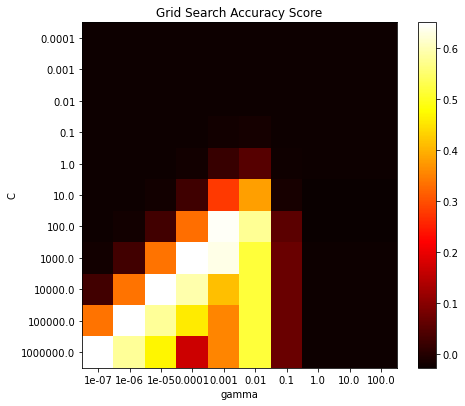

In [271]:
import matplotlib.pyplot as plt
import numpy as np
scores = gs.cv_results_['mean_test_score'][len(param_range):].reshape(len(param_range),len(param_range2))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma') # 1/(softness of decision boundary), i.e. small = soft
plt.ylabel('C')     # 1/(size of support vector margin), i.e. large = tight margin
plt.colorbar()
plt.xticks(np.arange(len(param_range2)), param_range2)
plt.yticks(np.arange(len(param_range)), param_range)
plt.title('Grid Search Accuracy Score')
plt.show()